In [94]:
# Scroll down to bottom for L3T03-Random Forests Task

# importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call



In [95]:
# Read in file 
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
# You can also drop whichever other columns you'd like here
titanic_data.drop("Cabin", axis=1, inplace=True)

# Preprocess data. Aim is to create decision tree that can predict 'Survival' of 
# passengers on the Titanic. Map categorical data to numerical values and handle
# missing values

titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Choose relevant features for the model
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[selected_features]
y = titanic_data['Survived']


/var/folders/m7/3y4fdpjn45qdddmm1wfk91x40000gn/T/ipykernel_19905/2439650496.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/var/folders/m7/3y4fdpjn45qdddmm1wfk91x40000gn/T/ipykernel_19905/2439650496.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [98]:
# Split the data into training, development and test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


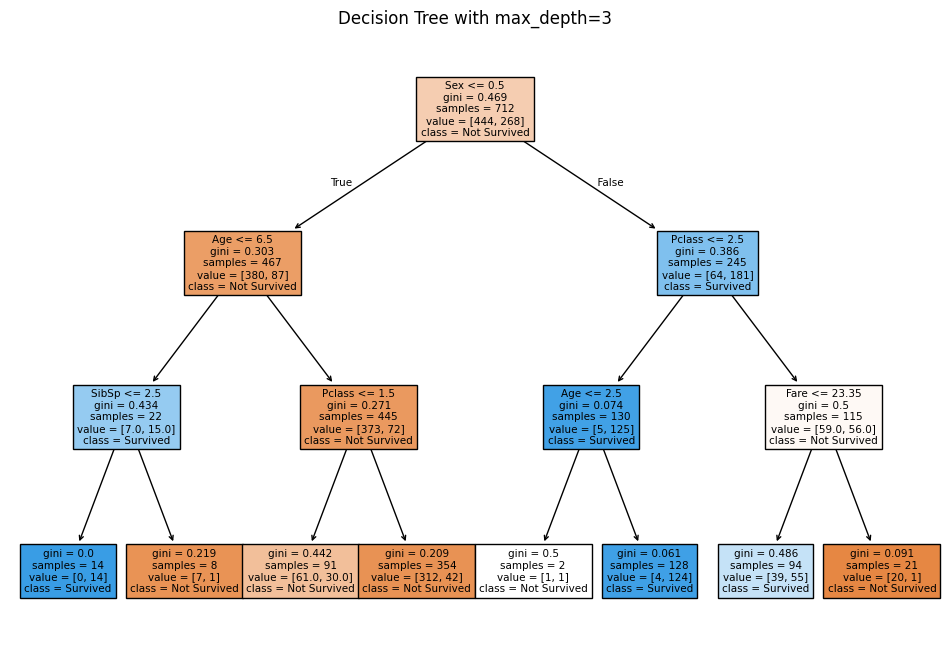

In [99]:
# Train a tree and make a plot of it 


decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)


plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=selected_features, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree with max_depth=3")
plt.show()

In [100]:
# Compute model's accuracy on the development set

dev_predictions = decision_tree.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, dev_predictions)
dev_accuracy


0.7972027972027972

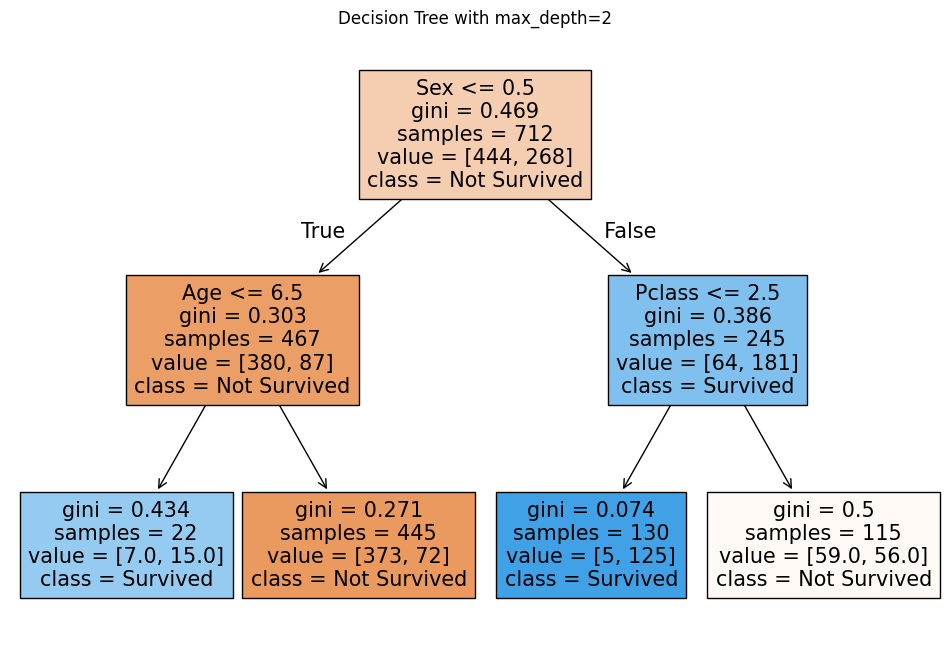

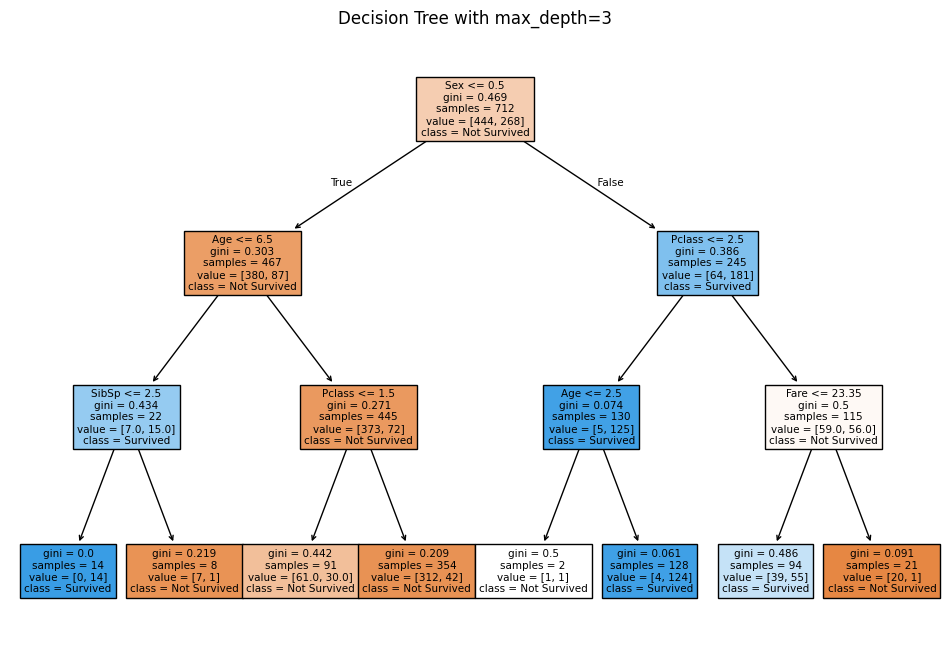

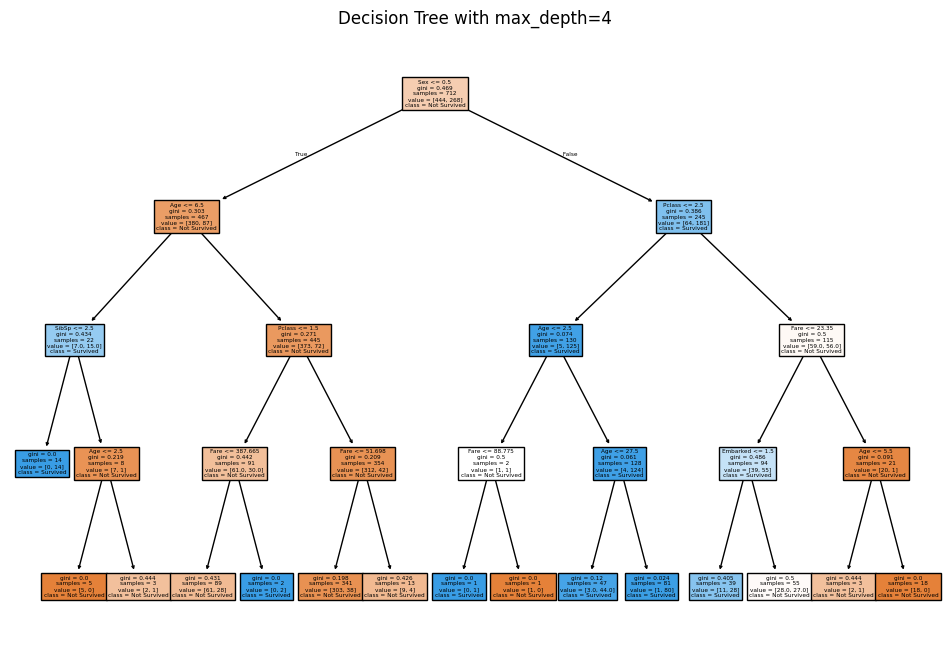

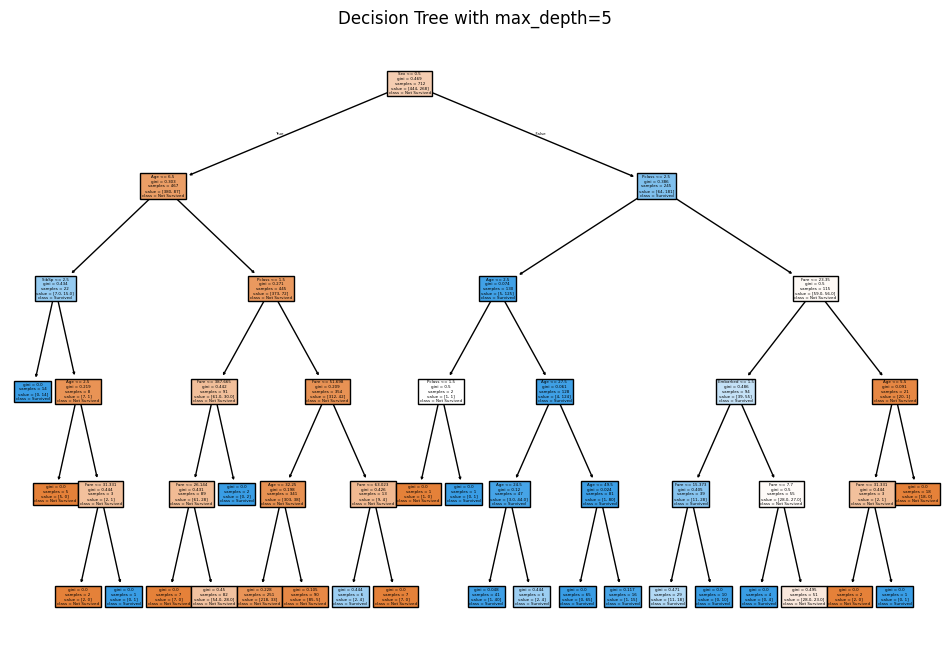

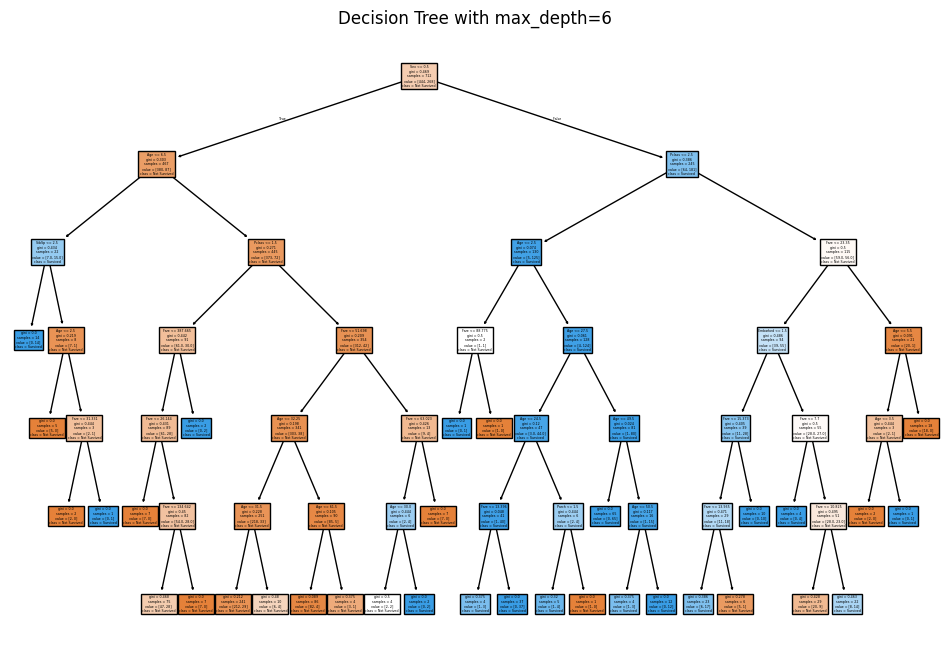

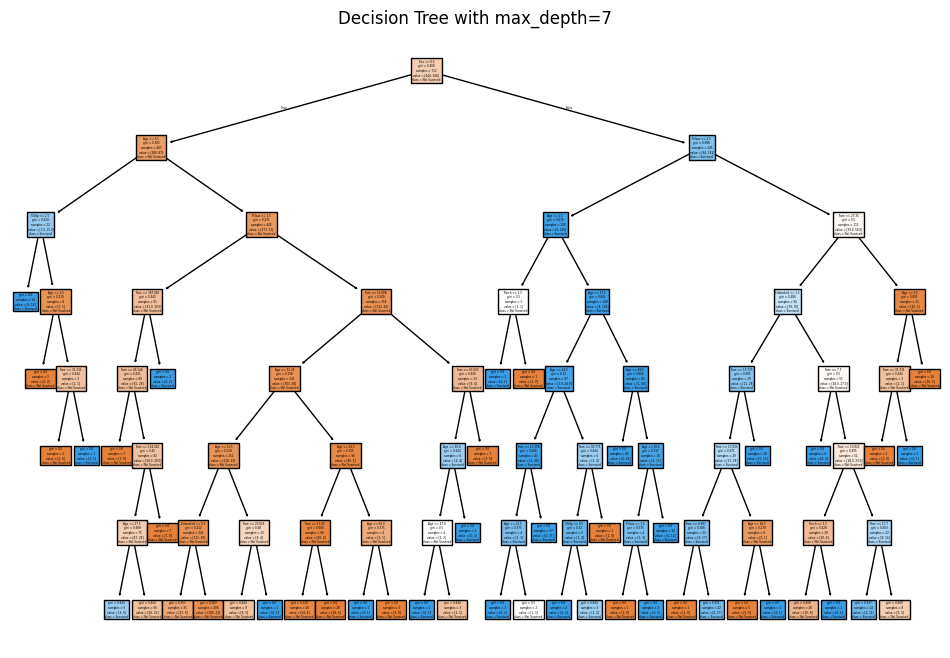

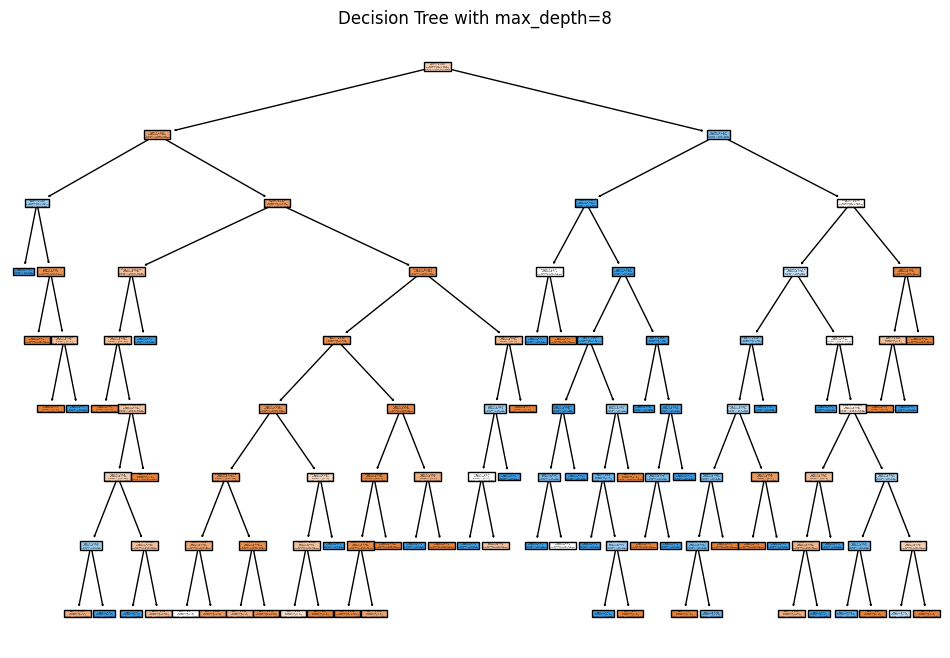

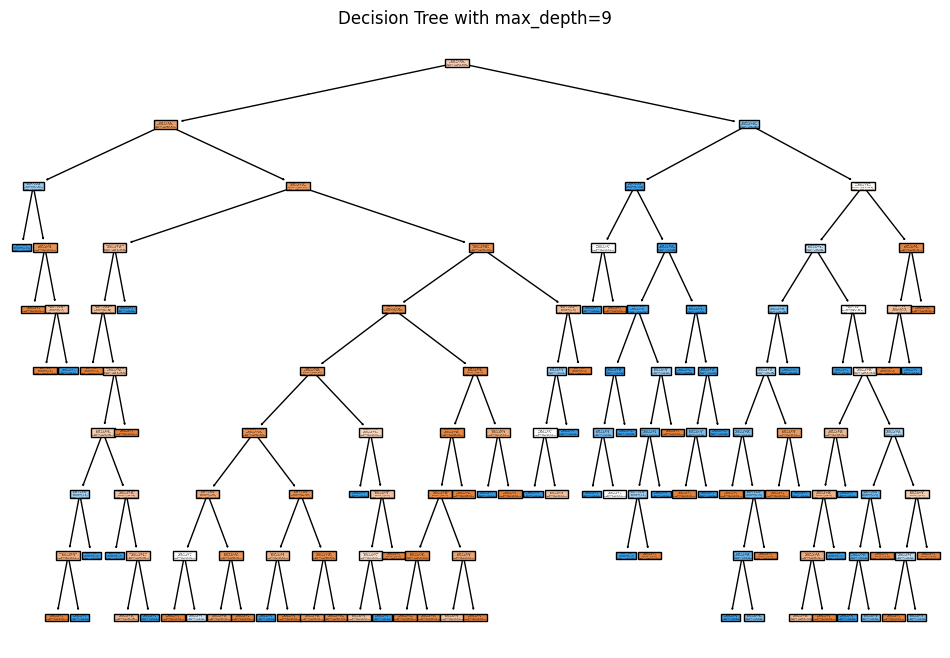

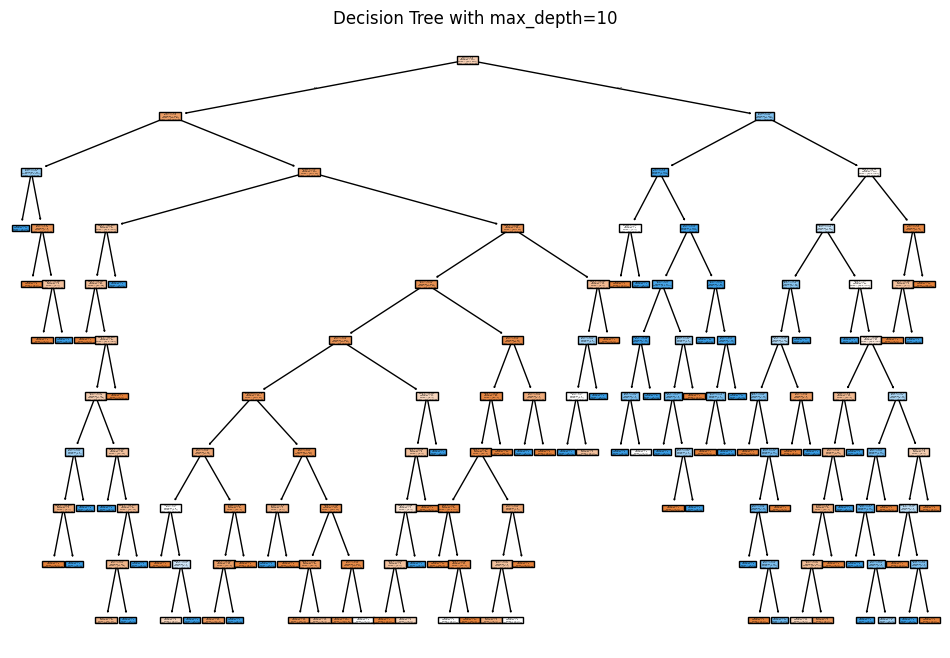

In [101]:
# Build model with different values of max depth [2-10]. At each step create a
# plot of tree and store accuracies on both the training and development data

training_accuracies = []
development_accuracies = []

for depth in range(2, 11):
    # Train decision tree with specified max depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    dev_accuracy = accuracy_score(y_dev, model.predict(X_dev))
    
    # Store accuracies
    training_accuracies.append(train_accuracy)
    development_accuracies.append(dev_accuracy)
    
    # Plot the tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=selected_features, class_names=["Not Survived", "Survived"], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

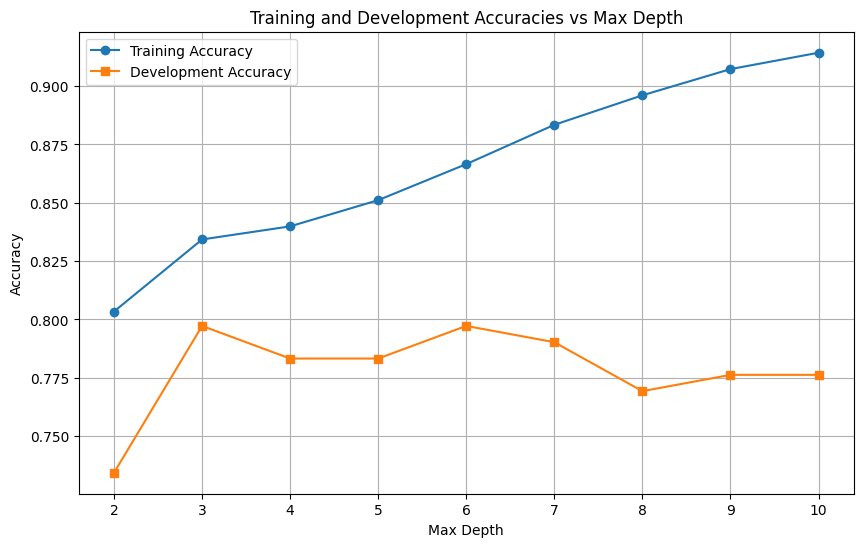

In [102]:
# Plot a line of training accuracies and another of development accuracies in
# same graph

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), training_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(2, 11), development_accuracies, marker='s', label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs Max Depth')
plt.legend()
plt.grid()
plt.show()

Write down what shape the lines have and what the lines mean:

The training accuracy increases consistently as the max depth grows, eventually reaching near 100%. However, the development accuracy peaks at a certain depth and starts to decline, indicating overfitting. The optimal depth is where development accuracy is highest.

In [103]:
# Report accuracy of final model on the test data

# Identify the optimal depth (where development accuracy peaks)
            
optimal_depth = np.argmax(development_accuracies) + 2  # Adding 2 as range starts from 2
final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_model.fit(X_train, y_train)

# Compute test accuracy
test_predictions = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Optimal Depth:", optimal_depth)
print("Test Accuracy:", test_accuracy)




Optimal Depth: 3
Test Accuracy: 0.8055555555555556


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [104]:
# These sections were already in the notebook, so didn't realise they were part 
# of the task, hence the inconsistencies in variable naming 

titanic_data["Sex"].unique()

array([0, 1])

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [105]:
titanic_data = pd.get_dummies(titanic_data, prefix="Sex", columns=["Sex"])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_0,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2.0,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2.0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2.0,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2.0,True,False


Now, we do the same to the "Embarked" column.

In [106]:
titanic_df = pd.get_dummies(titanic_data, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,True,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,False,False,True


L3T03-Random Forests Task starts here:

In [107]:
# Create a bagged tree, along with its accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_tree.fit(X_train, y_train)
y_pred_bagged = bagged_tree.predict(X_test)
accuracy_bagged = accuracy_score(y_test, y_pred_bagged)
print(f"Bagged Trees Accuracy: {accuracy_bagged}")

Bagged Trees Accuracy: 0.8333333333333334


In [108]:
# Create a Random Forest Tree, along with its accuracy

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8333333333333334


In [109]:
# Create a Boosted Tree, along with its accuracy 

from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree.fit(X_train, y_train)
y_pred_boosted = boosted_tree.predict(X_test)
accuracy_boosted = accuracy_score(y_test, y_pred_boosted)
print(f"Boosted Trees Accuracy: {accuracy_boosted}")

Boosted Trees Accuracy: 0.8611111111111112


In [110]:
# From the Random Forest model, determine which of the features is the one that
# contributes the most to predicting whether a passenger survives or not

importances = random_forest.feature_importances_

# Get the names of the features used in the model
feature_names = X.columns

# Create a pandas Series to pair feature names with their importance values
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)

Fare        0.272501
Sex         0.269387
Age         0.251845
Pclass      0.087854
SibSp       0.047876
Parch       0.037125
Embarked    0.033413
dtype: float64


In [111]:
# Pick one of these methods and tune the parameters n_estimators and max_depth

from sklearn.model_selection import GridSearchCV

# Define parameter grid to cross validate to identify best combination of parameters

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create random forest model, with grid search of 5-fold cross validation

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Random Forest Accuracy: 0.8888888888888888
Best Parameters: {'max_depth': 10, 'n_estimators': 50}


In [112]:
# Report the accuracy of all models and report which model performed the
# best, including the values for n_estimators and max_depth that the best 
# model had

print(f"Bagged Trees Accuracy: {accuracy_bagged}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Boosted Trees Accuracy: {accuracy_boosted}")
print(f"Best Random Forest Accuracy: {accuracy_best_rf}")
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

Bagged Trees Accuracy: 0.8333333333333334
Random Forest Accuracy: 0.8333333333333334
Boosted Trees Accuracy: 0.8611111111111112
Best Random Forest Accuracy: 0.8888888888888888
Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 50}
